### ItemExtracting Stock Data Using a Python

In [1]:
import yfinance as yf
import pandas as pd

In [8]:
apple = yf.Ticker("AAPL")

In [11]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
response = requests.get(url)

with open("apple.json", "wb") as file:
    file.write(response.content)

In [42]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
#apple_info

In [13]:
apple_info['country']

'United States'

In [16]:
apple_share_price_data = apple.history(period="max")

In [19]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


In [39]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

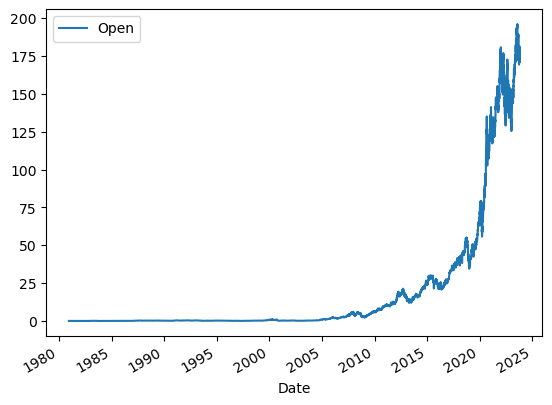

In [21]:
apple_share_price_data.plot(x="Date", y="Open")

In [22]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
Name: Dividends, Length: 80, dtype: float64

<Axes: xlabel='Date'>

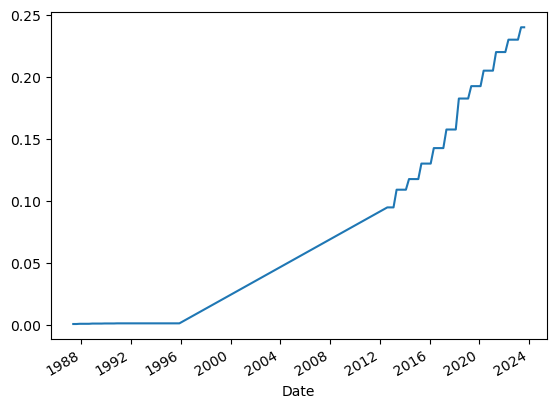

In [23]:
apple.dividends.plot()

In [25]:
AMD = yf.Ticker('AMD')

In [27]:
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json'
response = requests.get(url,'amd.json')
with open('amd.json','wb') as file:
    file.write(response.content)

In [31]:
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
#amd_info

In [29]:
amd_info['country']

'United States'

In [30]:
amd_info['sector']

'Technology'

In [33]:
AMD_share_price_data = AMD.history(period='max')

In [38]:
AMD_share_price_data['Volume'][0]

219600

### Extracting Stock Data Using Web Scraping

In [2]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data = requests.get(url).text
# print(data)

In [5]:
soup = BeautifulSoup(data,'html5lib')

In [13]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close","Adj Close", "Volume"])

In [24]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    netflix_data = pd.concat([netflix_data,pd.DataFrame({'Date': [date], 'Open': [Open], 'High': [high], 'Low': [low], 'Close': [close], 'Adj Close': [adj_close], 'Volume': [volume]})],ignore_index=True)


In [25]:
netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"


In [29]:
read_html_pandas_data = pd.read_html(url)

In [27]:
#read_html_pandas_data = pd.read_html(str(soup))

In [30]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [31]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'

In [33]:
html_data = requests.get(url).text

In [34]:
soup = BeautifulSoup(html_data,'html5lib')

In [37]:
soup.find('title')

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [57]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = pd.concat([amazon_data,pd.DataFrame({'Date': [date], 'Open': [Open], 'High': [high], 'Low': [low], 'Close': [close], 'Adj Close': [adj_close], 'Volume': [volume]})],ignore_index=True)

In [58]:
amazon_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
56,"May 01, 2016",663.92,724.23,656.00,722.79,722.79,"90,614,500"
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,659.59,"78,464,200"
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,"94,009,500"
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,"124,144,800"
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,"130,200,900"


In [59]:
amazon_data['Open'].iloc[-1]

'656.29'

### Extracting and Visualizing Stock Data

In [61]:
import yfinance as yf
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [131]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.update_layout(showlegend=False, height=900, title_text='GameStop Stock Graph', xaxis_rangeslider_visible=True)
    fig.show()

In [63]:
Tesla = yf.Ticker('TSLA')

In [64]:
Tesla_data = Tesla.history(period='max')

In [65]:
Tesla_data.reset_index(inplace=True)

In [67]:
Tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [107]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [108]:
soup = BeautifulSoup(html_data,'html5lib')

In [109]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [110]:
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

In [112]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(int)

In [113]:
tesla_revenue.dropna(inplace=True)

In [114]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [115]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [132]:
GME = yf.Ticker('GME')

In [133]:
gme_data = GME.history(period='max')

In [134]:
gme_data.reset_index(inplace=True)

In [135]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [136]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [137]:
soup = BeautifulSoup(html_data,'html5lib')

In [138]:
gme_revenue_html = pd.read_html(url)
gme_revenue = gme_revenue_html[0]
# Rename columns
gme_revenue.rename(columns={"GameStop Annual Revenue (Millions of US $)": 'Date', "GameStop Annual Revenue (Millions of US $).1": 'Revenue'}, inplace=True)
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(int)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


C:\Users\gh\AppData\Local\Temp\ipykernel_9412\3878318260.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\gh\AppData\Local\Temp\ipykernel_9412\3878318260.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



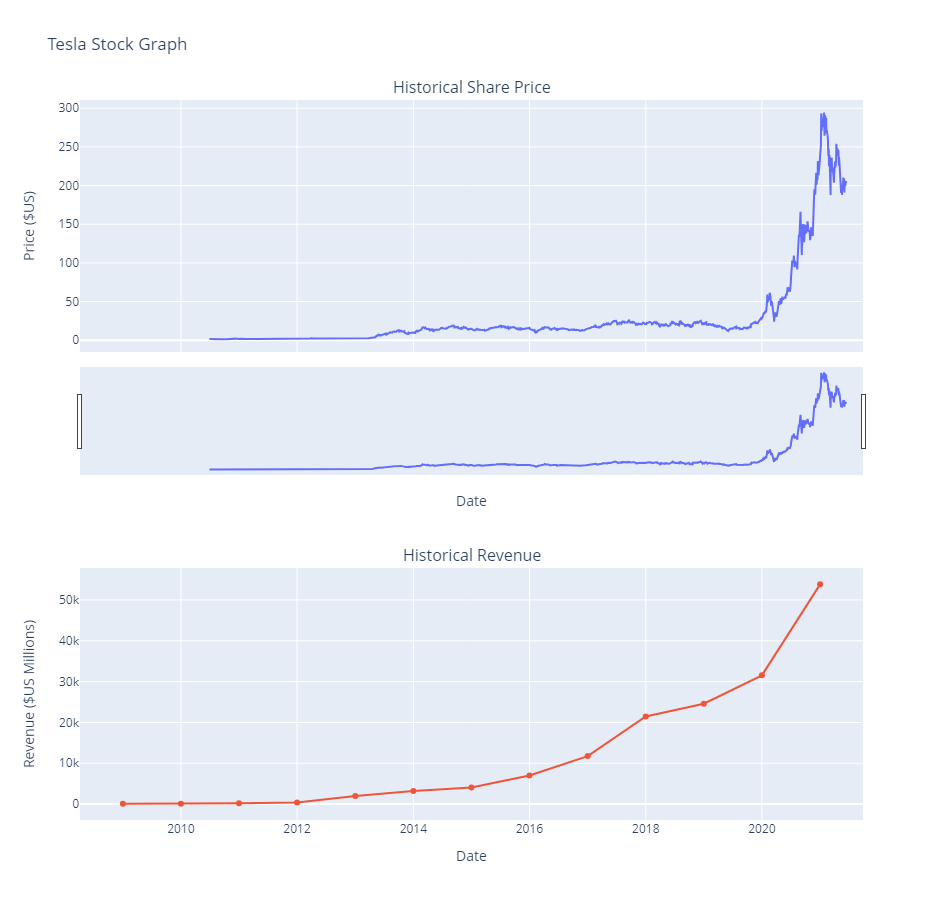

In [129]:
make_graph(Tesla_data, tesla_revenue, 'Tesla')

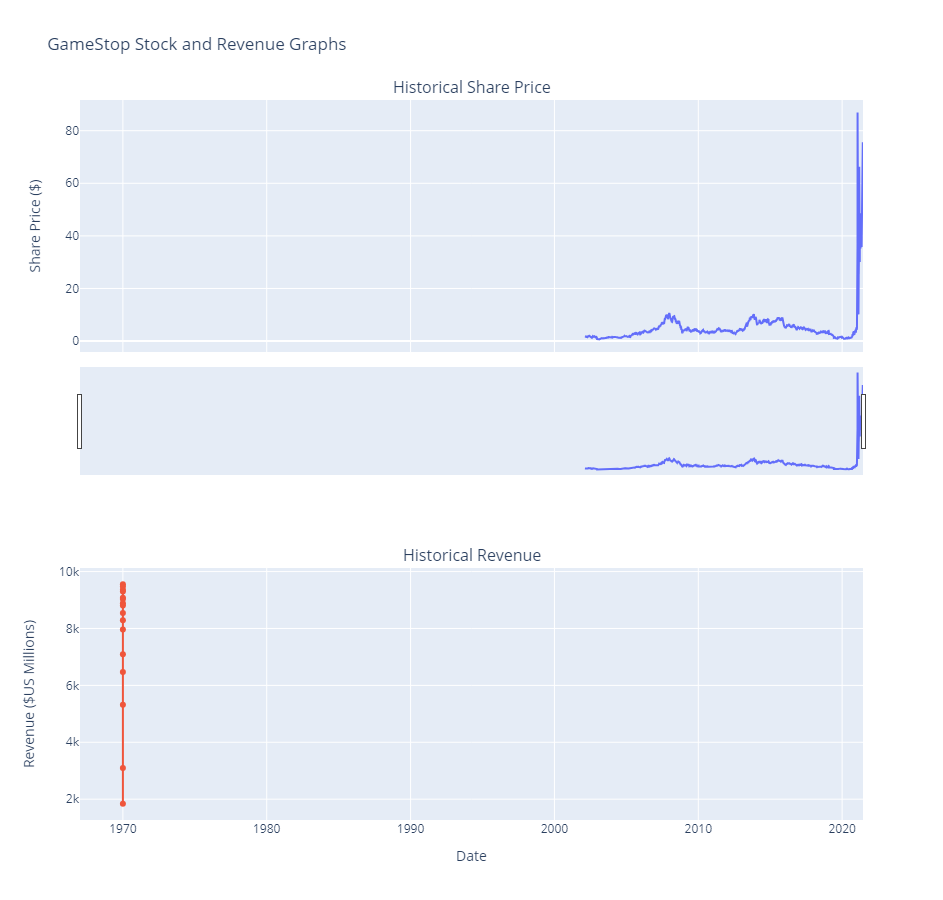

In [142]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock, graph_title):
    # Create a subplot figure with two rows and one column
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    
    # Convert the date columns to datetime objects without timezone information
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.date
    
    # Convert the date string to a datetime.date object for comparison
    end_date = pd.to_datetime('2021-06-14').date()
    
    # Filter data based on date
    stock_data_specific = stock_data[stock_data['Date'] <= end_date]
    
    # Convert the date string to a datetime.date object for comparison
    revenue_end_date = pd.to_datetime('2021-04-30').date()
    revenue_data_specific = revenue_data[revenue_data['Date'] <= revenue_end_date]

    # Add traces to the subplot
    fig.add_trace(go.Scatter(x=stock_data_specific['Date'], y=stock_data_specific['Close'], name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], y=revenue_data_specific['Revenue'], name="Revenue"), row=2, col=1)

    # Update axis labels
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Share Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    # Update the layout with a single title for all the graphs
    fig.update_layout(showlegend=False, height=900, title_text=graph_title, xaxis_rangeslider_visible=True)

    # Show the figure
    fig.show()

# Example usage
make_graph(gme_data, gme_revenue, 'GameStop', 'GameStop Stock and Revenue Graphs')
